# Assistant
The error occurs because Python cannot find the file "netflix_title.csv" in your current working directory.

Would you like me to provide the corrected code?

In [9]:
import pandas as pd

# Specify the full path to the file
file_path = r"C:/Users/Admin/Downloads/extraction/netflix_titles.csv"

# Load CSV file with the full path
df = pd.read_csv(file_path)

# Show Top 5 rows
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
#Shape of the data
print("Shape :", df.shape)

#Column Names
print("Columns :", df.columns)

# info about Datatype
df.info()

#Check for missing values
df.isnull().sum()


Shape : (8807, 12)
Columns : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
#Convert 'date-added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

#Create new columns for year and months added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

#Drop rows with null in impotant columns
df.dropna(subset=['date_added'], inplace=True)

#Fill Missing values in other columns
df['director'].fillna('No Director Information', inplace=True)
df['cast'].fillna('No Cast Information', inplace=True)
df['country'].fillna('No Country Information', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1210343903.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\1210343903.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('No Director Information', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\121

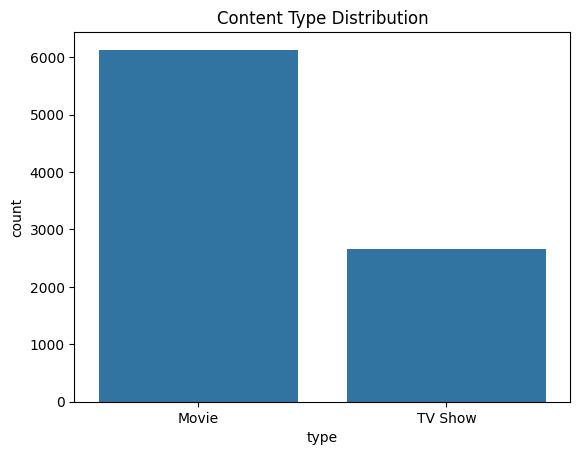

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title("Content Type Distribution")
plt.show()


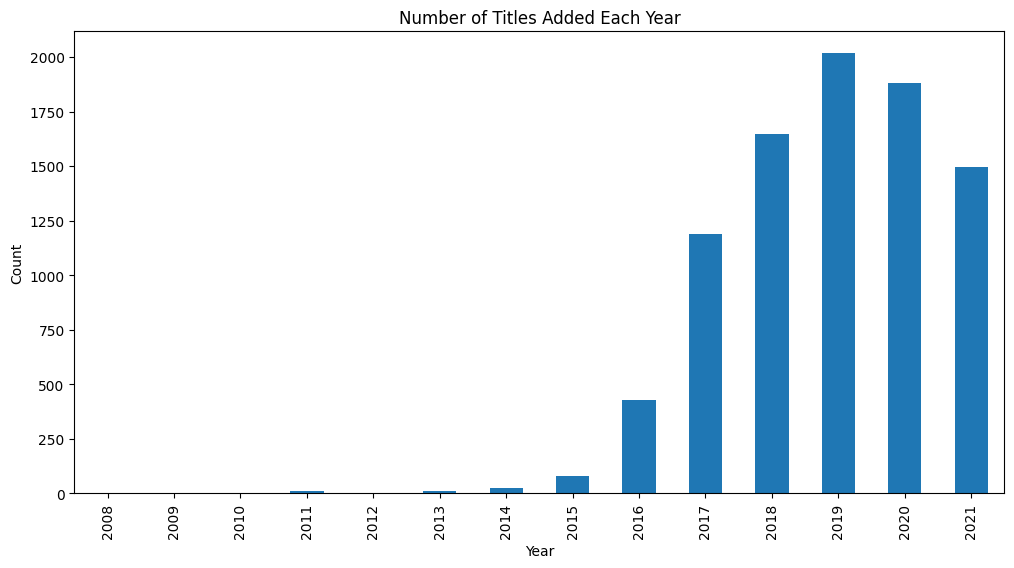

In [20]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Number of Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


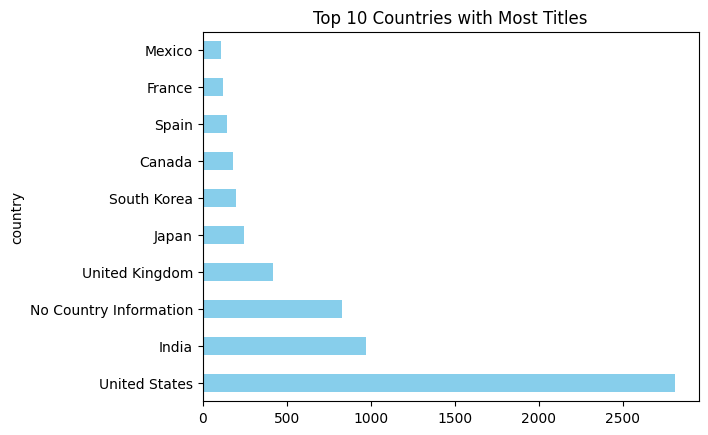

In [21]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries with Most Titles")
plt.show()


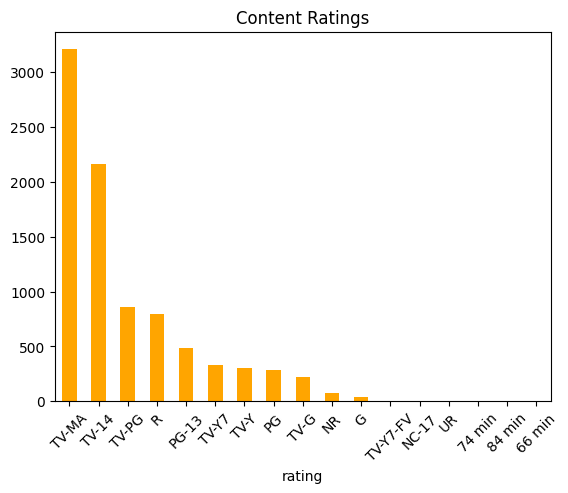

In [22]:
df['rating'].value_counts().plot(kind='bar', color='orange')
plt.title("Content Ratings")
plt.xticks(rotation=45)
plt.show()


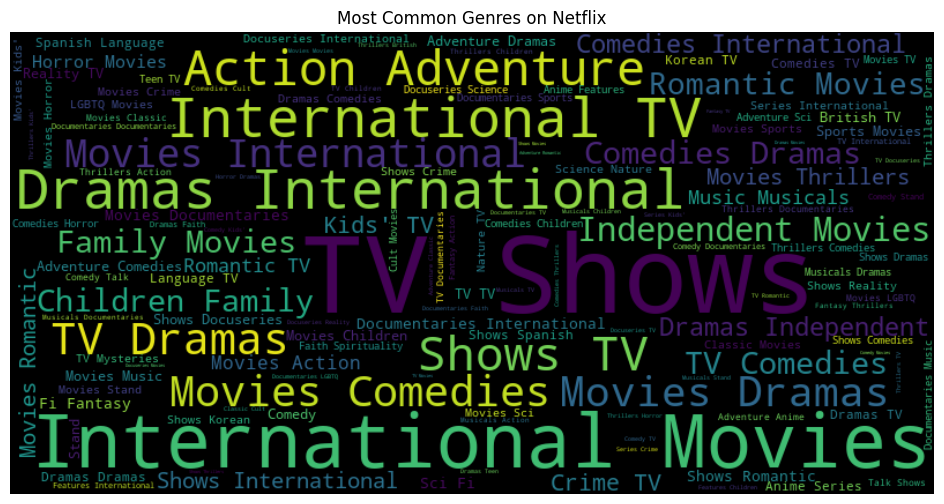

In [23]:
from wordcloud import WordCloud

text = " ".join(df['listed_in'].dropna())
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Genres on Netflix")
plt.show()


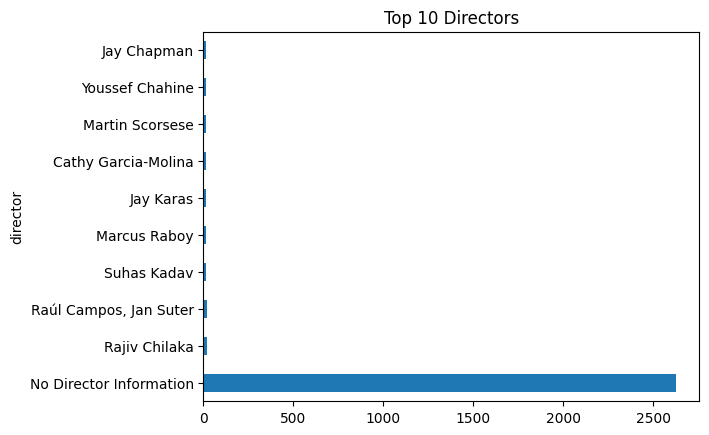

In [24]:
df['director'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Directors")
plt.show()


In [25]:
df_movies = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']


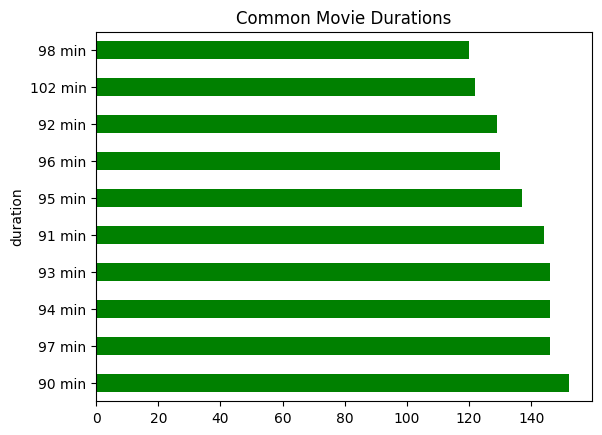

In [26]:
df_movies['duration'].value_counts().head(10).plot(kind='barh', color='green')
plt.title("Common Movie Durations")
plt.show()


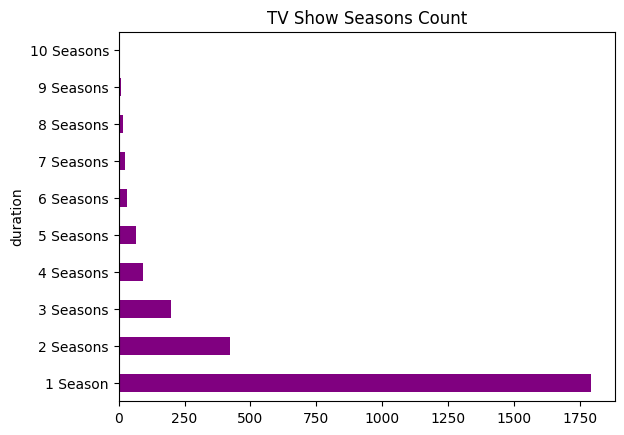

In [27]:
df_shows['duration'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title("TV Show Seasons Count")
plt.show()
